# Traitement des dataframes et nettoyage des données

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset 2019

In [493]:
data_2019 = pd.read_csv('../raw_data/ped_data_2019.csv')

In [494]:
data_2019

,Time,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,...,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,01-01-2019 00:00:00,244,1914.0,20,16,NaN,NaN,NaN,NaN,NaN,...,NaN,95.0,1670.0,255.0,881.0,1988.0,140.0,NaN,NaN,NaN
1,01-01-2019 00:15:00,454,NaN,24,62,NaN,NaN,NaN,NaN,NaN,...,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2019 00:30:00,391,NaN,69,99,NaN,NaN,NaN,NaN,NaN,...,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2019 00:45:00,415,NaN,50,61,NaN,NaN,NaN,NaN,NaN,...,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2019 01:00:00,319,885.0,24,47,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,767.0,209.0,723.0,1270.0,215.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,31-12-2019 22:45:00,389,NaN,13,38,797.0,782.0,52.0,173.0,6.0,...,283.0,NaN,NaN,NaN,NaN,NaN,NaN,303.0,280.0,221.0
35032,31-12-2019 23:00:00,324,1967.0,18,39,914.0,743.0,48.0,220.0,1.0,...,287.0,NaN,1217.0,NaN,936.0,2898.0,1220.0,278.0,256.0,212.0
35033,31-12-2019 23:15:00,306,NaN,19,69,724.0,821.0,38.0,241.0,4.0,...,266.0,NaN,NaN,NaN,NaN,NaN,NaN,278.0,249.0,287.0
35034,31-12-2019 23:30:00,249,NaN,11,69,971.0,795.0,69.0,357.0,5.0,...,302.0,NaN,NaN,NaN,NaN,NaN,NaN,403.0,319.0,207.0


##  Je splite le dataframe 2019 pour traiter les données horaires uniquement.

In [495]:
data_2019_cleaned = data_2019.loc[:,['Time','O\'Connell St Outside Clerys', 'Dawson Street Replacement', 'Westmoreland Street East', 'Dawson Street',\
'Liffey Street', 'Westmoreland Street West', 'Grafton Street']]

In [496]:
data_2019_cleaned

,Time,O'Connell St Outside Clerys,Dawson Street Replacement,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street
0,01-01-2019 00:00:00,1914.0,NaN,1670.0,255.0,881.0,1988.0,140.0
1,01-01-2019 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2019 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2019 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2019 01:00:00,885.0,NaN,767.0,209.0,723.0,1270.0,215.0
...,...,...,...,...,...,...,...,...
35031,31-12-2019 22:45:00,NaN,6.0,NaN,NaN,NaN,NaN,NaN
35032,31-12-2019 23:00:00,1967.0,1.0,1217.0,NaN,936.0,2898.0,1220.0
35033,31-12-2019 23:15:00,NaN,4.0,NaN,NaN,NaN,NaN,NaN
35034,31-12-2019 23:30:00,NaN,5.0,NaN,NaN,NaN,NaN,NaN


### Concaténation de la colonne Dawson Street pour un capteur remplacé

In [497]:
data_2019_cleaned['Dawson total']=\
pd.concat([data_2019_cleaned['Dawson Street'].iloc[:30000],\
           data_2019_cleaned['Dawson Street Replacement'].iloc[30000:]])

In [498]:
data_2019_cleaned = data_2019_cleaned.drop(columns=['Dawson Street','Dawson Street Replacement'])

In [499]:
# Je renomme Dawson Street
data_2019_cleaned = data_2019_cleaned.rename(columns = {'Dawson total' : 'Dawson Street'})

### On ne garde que les comptage horaires

In [500]:
for i in range(data_2019_cleaned.shape[0]):
    if i%4 != 0 :
        data_2019_cleaned = data_2019_cleaned.drop(index = i)

In [501]:
data_2019_cleaned = data_2019_cleaned.reset_index(drop=True)

In [502]:
data_2019_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         8759 non-null   object 
 1   O'Connell St Outside Clerys  8759 non-null   float64
 2   Westmoreland Street East     8759 non-null   float64
 3   Liffey Street                8759 non-null   float64
 4   Westmoreland Street West     8759 non-null   float64
 5   Grafton Street               8759 non-null   float64
 6   Dawson Street                7607 non-null   float64
dtypes: float64(6), object(1)
memory usage: 479.1+ KB


Il reste toujours à combler la colonne Dawson Street

## Je passe au reste du dataframe 2019

In [503]:
data_2019_rest = data_2019.drop(columns=['Time','O\'Connell St Outside Clerys', 'Dawson Street Replacement', 'Westmoreland Street East', 'Dawson Street',\
'Liffey Street', 'Westmoreland Street West', 'Grafton Street'])

In [504]:
data_2019_rest

,O'Connell St Outside Pennys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,244,20,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN
1,454,24,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN,NaN
2,391,69,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,NaN,NaN,NaN
3,415,50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN
4,319,24,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,389,13,38,797.0,782.0,52.0,173.0,226.0,445.0,165.0,144.0,283.0,NaN,303.0,280.0,221.0
35032,324,18,39,914.0,743.0,48.0,220.0,274.0,353.0,124.0,110.0,287.0,NaN,278.0,256.0,212.0
35033,306,19,69,724.0,821.0,38.0,241.0,274.0,277.0,141.0,170.0,266.0,NaN,278.0,249.0,287.0
35034,249,11,69,971.0,795.0,69.0,357.0,383.0,348.0,110.0,116.0,302.0,NaN,403.0,319.0,207.0


In [505]:
data_2019_rest_recept = data_2019_rest

In [506]:
for column in data_2019_rest:
    for i in range(1,data_2019_rest.shape[0]):
        if i%4 == 0 :
            data_2019_rest_recept.loc[i, column] = sum(data_2019_rest.loc[i-3:i, column])

### J'enlève tout ce qui n'est pas un comptage horaire.

In [507]:
for i in range(data_2019_rest.shape[0]):
    if i%4 != 0 :
        data_2019_rest_recept = data_2019_rest_recept.drop(index = i)
    data_2019_rest_recept = data_2019_rest_recept

In [508]:
data_2019_rest_recept = data_2019_rest_recept.reset_index(drop=True)

In [509]:
data_2019_rest_recept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   O'Connell St Outside Pennys                      8759 non-null   int64  
 1   Mary Street                                      8759 non-null   int64  
 2   Capel Street                                     8759 non-null   int64  
 3   Aston Quay                                       7340 non-null   float64
 4   Grafton Street @ CompuB                          7390 non-null   float64
 5   Talbot Street North                              7346 non-null   float64
 6   Doilier Street, Burgh Quay                       7387 non-null   float64
 7   Dame Street                                      7390 non-null   float64
 8   Talbot Street South                              7382 non-null   float64
 9   O'Connell St, Parnell St @ AIB

## Je reforme le dataframe 2019

In [510]:
df2019_cleaned = pd.concat([data_2019_cleaned,data_2019_rest_recept], axis=1)

In [511]:
# Il manque un comptage à 01:00:00 le 31-03-2019

df2019_cleaned.iloc[2136:2138]

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
2136,31-03-2019 00:00:00,495.0,431.0,434.0,841.0,941.0,333.0,795,78,196,...,1568.0,737.0,3004.0,389.0,353.0,1112.0,299.0,693.0,681.0,518.0
2137,31-03-2019 02:00:00,343.0,269.0,354.0,736.0,931.0,232.0,507,50,112,...,1356.0,539.0,3070.0,239.0,239.0,780.0,179.0,487.0,404.0,348.0


## Je remplis les valeurs manquantes

###  Crée une copie

In [512]:
df2019_cleaned

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,01-01-2019 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN
1,01-01-2019 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,NaN,NaN,NaN,NaN,NaN,NaN,592.0,NaN,NaN,NaN
2,01-01-2019 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,NaN,NaN,NaN,NaN,NaN,NaN,349.0,NaN,NaN,NaN
3,01-01-2019 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,NaN,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN
4,01-01-2019 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,NaN,NaN,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,31-12-2019 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,278.0,1070.0,811.0,916.0,453.0,1026.0,NaN,1017.0,1040.0,803.0
8755,31-12-2019 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,352.0,1118.0,740.0,823.0,451.0,1027.0,NaN,1098.0,1115.0,1026.0
8756,31-12-2019 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,450.0,1194.0,990.0,628.0,384.0,1079.0,NaN,1203.0,984.0,767.0
8757,31-12-2019 22:00:00,1972.0,997.0,823.0,2461.0,1315.0,9.0,1415,86,218,...,492.0,1335.0,1434.0,509.0,424.0,1124.0,NaN,1358.0,903.0,750.0


In [513]:
data_2019_cleaned = df2019_cleaned.copy()

### Je retravaille les données temporelles pour sortir le cycle horaire journalier

In [514]:
# Je reprendrai cette stratégie pour les différentes colonnes des dataset suivants.
data_2019_cleaned['Time'] = pd.to_datetime(data_2019_cleaned['Time'])

In [515]:
# J'ajoute une colonne pour rassembler tous les comptages par heure

data_2019_cleaned['hour_cycle'] = 0
for i in range(data_2019_cleaned.shape[0]):
    data_2019_cleaned['hour_cycle'][i] = data_2019_cleaned['Time'][i].hour

/tmp/ipykernel_580/2313632131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019_cleaned['hour_cycle'][i] = data_2019_cleaned['Time'][i].hour


In [516]:
# pour mettre le cycle en index
data_2019_count = data_2019_cleaned.set_index('hour_cycle', drop=False)

### Test visuel pour vérifier la cohérence 

<AxesSubplot:xlabel='hour_cycle', ylabel='Henry Street'>

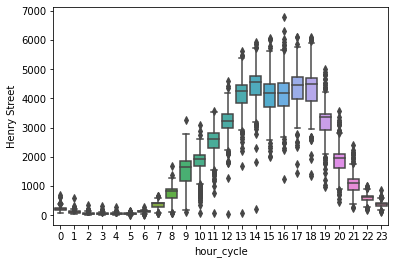

In [517]:
sns.boxplot(x='hour_cycle', y='Henry Street', data=df_test)

<AxesSubplot:xlabel='hour_cycle', ylabel='Dame Street'>

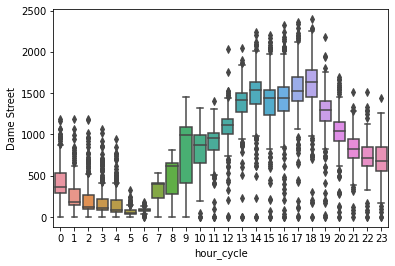

In [518]:
sns.boxplot(x='hour_cycle', y='Dame Street', data=df_test)

In [519]:
df_test['hour_cycle'].value_counts()

# Il manque un comptage à 01:00:00 le 31-03-2019
#df2019_cleaned.iloc[2136:2138]

0     365
13    365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
1     364
Name: hour_cycle, dtype: int64

In [520]:
df_test_1

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side,hour_cycle
hour_cycle,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,0
1,2019-01-01 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,NaN,NaN,NaN,NaN,NaN,592.0,NaN,NaN,NaN,1
2,2019-01-01 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,NaN,NaN,NaN,NaN,NaN,349.0,NaN,NaN,NaN,2
3,2019-01-01 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN,3
4,2019-01-01 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,NaN,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2019-12-31 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,1070.0,811.0,916.0,453.0,1026.0,NaN,1017.0,1040.0,803.0,19
20,2019-12-31 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,1118.0,740.0,823.0,451.0,1027.0,NaN,1098.0,1115.0,1026.0,20
21,2019-12-31 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,1194.0,990.0,628.0,384.0,1079.0,NaN,1203.0,984.0,767.0,21


### Travail sur les valeurs manquantes

In [521]:
# Je sors toutes les colonnes avec des valeurs manquantes
df_count = data_2019_count[['Dame Street', 'Dawson Street', 'Aston Quay','Grafton Street @ CompuB','Talbot Street North',\
                     'Doilier Street, Burgh Quay','Talbot Street South',\
                     'O\'Connell St, Parnell St @ AIB','Grafton Street / Nassau Street / Suffolk Street',\
                     'College Green, Bank Of Ireland','Henry Street','Bachelors Walk',\
                     'College Green @ Church Lane','College Green - Dame St Side' ,'hour_cycle']]

In [522]:
# je les rassemble par heure, en virant les Nan
df_count = df_count.drop(columns='hour_cycle').dropna().groupby(by="hour_cycle").agg('median').reset_index(drop=False)

In [523]:
#J'obtiens la distribution médiane par heure pour chaque rue
df_count

,hour_cycle,Dame Street,Dawson Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,0,358.0,57.0,510.0,875.0,94.0,440.0,1832.0,244.0,166.0,434.0,218.0,260.0,328.0,258.0
1,1,181.5,24.0,234.0,421.0,51.5,148.5,2522.0,118.0,72.5,206.5,99.0,113.0,116.5,102.0
2,2,121.0,16.0,140.0,280.0,32.0,93.0,2435.0,68.0,40.0,141.0,55.0,68.0,62.0,53.0
3,3,108.0,11.0,110.0,254.0,22.0,195.0,1984.0,59.0,36.0,130.0,46.0,55.0,51.0,50.0
4,4,83.0,5.0,82.0,206.0,19.0,40.0,1588.0,44.0,20.0,118.0,47.0,46.0,36.0,23.0
5,5,48.0,12.0,46.0,139.0,17.0,18.0,1227.0,34.0,20.0,77.0,50.0,24.0,23.0,24.0
6,6,82.0,71.0,82.0,243.0,27.0,66.0,1154.0,79.0,39.0,112.0,126.0,40.0,67.0,81.0
7,7,394.0,233.0,367.0,998.0,87.0,414.0,1802.0,237.0,164.0,302.0,403.0,225.0,473.0,349.0
8,8,612.0,562.0,606.0,1704.0,190.0,711.0,2219.0,413.0,326.0,490.0,827.0,488.0,698.0,902.0
9,9,991.0,460.0,905.0,2315.0,253.0,948.0,1952.0,772.0,691.0,931.0,1665.0,699.0,1318.0,1765.0


In [524]:
column_list_2019 = ['Dame Street', 'Dawson Street', 'Aston Quay','Grafton Street @ CompuB','Talbot Street North',\
                     'Doilier Street, Burgh Quay','Talbot Street South',\
                     'O\'Connell St, Parnell St @ AIB','Grafton Street / Nassau Street / Suffolk Street',\
                     'College Green, Bank Of Ireland','Henry Street','Bachelors Walk',\
                     'College Green @ Church Lane','College Green - Dame St Side']

In [525]:
for column in column_list_2019 :

    mapping_2019 = df_count[column]

    data_2019_cleaned[column]=data_2019_cleaned[column].fillna(data_2019_cleaned['hour_cycle'].map(mapping_2019))

In [526]:
data_2019_cleaned

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side,hour_cycle
0,2019-01-01 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,358.0,1832.0,244.0,166.0,434.0,95.0,260.0,328.0,258.0,0
1,2019-01-01 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,181.5,2522.0,118.0,72.5,206.5,592.0,113.0,116.5,102.0,1
2,2019-01-01 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,121.0,2435.0,68.0,40.0,141.0,349.0,68.0,62.0,53.0,2
3,2019-01-01 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,108.0,1984.0,59.0,36.0,130.0,322.0,55.0,51.0,50.0,3
4,2019-01-01 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,83.0,1588.0,44.0,20.0,118.0,288.0,46.0,36.0,23.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2019-12-31 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,1070.0,811.0,916.0,453.0,1026.0,3358.0,1017.0,1040.0,803.0,19
8755,2019-12-31 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,1118.0,740.0,823.0,451.0,1027.0,1948.0,1098.0,1115.0,1026.0,20
8756,2019-12-31 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,1194.0,990.0,628.0,384.0,1079.0,1090.0,1203.0,984.0,767.0,21
8757,2019-12-31 22:00:00,1972.0,997.0,823.0,2461.0,1315.0,9.0,1415,86,218,...,1335.0,1434.0,509.0,424.0,1124.0,632.0,1358.0,903.0,750.0,22


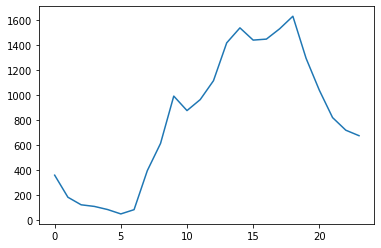

In [527]:
plt.plot(df_count['hour_cycle'], df_count['Dame Street'])

<AxesSubplot:xlabel='hour_cycle', ylabel='Dame Street'>

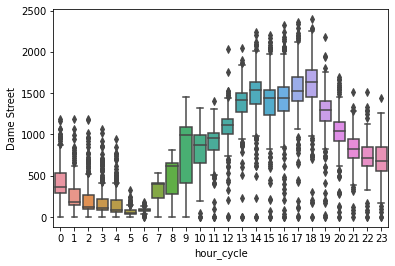

In [528]:
sns.boxplot(x=data_2019_cleaned['hour_cycle'], y=data_2019_cleaned['Dame Street'])

Liste des rues avec des valeurs manquantes :

Aston Quay                                         1419 <br>
Grafton Street @ CompuB                            1369<br>
Talbot Street North                                1413<br>
Doilier Street, Burgh Quay                         1372<br>
Dame Street                                        1369<br>
Talbot Street South                                1377<br>
O'Connell St, Parnell St @ AIB                     1851<br>
Grafton Street / Nassau Street / Suffolk Street    1369<br>
College Green, Bank Of Ireland                     1369<br>
Henry Street                                       1656<br>
Bachelors Walk                                     1522<br>
College Green @ Church Lane                        1516<br>
College Green - Dame St Side                       1516<br>

## Gestion finale des colonnes (noms, virer le cycle), puis export df

In [529]:
df_2019_final_1 = data_2019_cleaned.rename(columns={'Time':'Date and Time'})

In [530]:
df_2019_final = df_2019_final_1[['Date and Time', 'Aston Quay', 'Bachelors Walk','Capel Street',
                  'College Green, Bank Of Ireland', 
                  'College Green @ Church Lane', 
                  'College Green - Dame St Side',
                  'Doilier Street, Burgh Quay', 
                  'Dame Street',
                  'Dawson Street', 
                  'Grafton Street',
                  'Grafton Street / Nassau Street / Suffolk Street',
                  'Grafton Street @ CompuB',
                  'Henry Street',
                  'Liffey Street',
                  'Mary Street',
                  'O\'Connell St, Parnell St @ AIB',
                  'O\'Connell St Outside Pennys', 
                  'O\'Connell St Outside Clerys', 
                   'Talbot Street South',   
                  'Talbot Street North', 
                  'Westmoreland Street West',
                  'Westmoreland Street East',
                  'hour_cycle']]

In [541]:
df_2019_final = df_2019_final.round().astype({'Capel Street': 'float64', 'Mary Street':'float64','O\'Connell St Outside Pennys':'float64'})

,Date and Time,Bachelors Walk,Capel Street,"College Green, Bank Of Ireland",College Green @ Church Lane,College Green - Dame St Side,"Doilier Street, Burgh Quay",Dame Street,Dawson Street,Grafton Street,...,Liffey Street,Mary Street,"O'Connell St, Parnell St @ AIB",O'Connell St Outside Pennys,O'Connell St Outside Clerys,Talbot Street South,Talbot Street North,Westmoreland Street West,Westmoreland Street East,hour_cycle
0,2019-01-01 00:00:00,260.0,16.0,434.0,328.0,258.0,440.0,358.0,255.0,140.0,...,881.0,20.0,244.0,244.0,1914.0,1832.0,94.0,1988.0,1670.0,0
1,2019-01-01 01:00:00,113.0,269.0,206.0,116.0,102.0,148.0,182.0,209.0,215.0,...,723.0,167.0,118.0,1579.0,885.0,2522.0,52.0,1270.0,767.0,1
2,2019-01-01 02:00:00,68.0,149.0,141.0,62.0,53.0,93.0,121.0,193.0,210.0,...,1010.0,85.0,68.0,1164.0,984.0,2435.0,32.0,1589.0,642.0,2
3,2019-01-01 03:00:00,55.0,125.0,130.0,51.0,50.0,195.0,108.0,178.0,204.0,...,772.0,79.0,59.0,1204.0,935.0,1984.0,22.0,1534.0,582.0,3
4,2019-01-01 04:00:00,46.0,179.0,118.0,36.0,23.0,40.0,83.0,35.0,88.0,...,197.0,52.0,44.0,1308.0,390.0,1588.0,19.0,610.0,143.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2019-12-31 19:00:00,1017.0,331.0,1026.0,1040.0,803.0,278.0,1070.0,43.0,1190.0,...,910.0,236.0,916.0,1634.0,1750.0,811.0,349.0,1929.0,763.0,19
8755,2019-12-31 20:00:00,1098.0,324.0,1027.0,1115.0,1026.0,352.0,1118.0,61.0,1239.0,...,989.0,226.0,823.0,1571.0,1644.0,740.0,332.0,1984.0,727.0,20
8756,2019-12-31 21:00:00,1203.0,271.0,1079.0,984.0,767.0,450.0,1194.0,6.0,1314.0,...,779.0,131.0,628.0,1432.0,1554.0,990.0,328.0,2120.0,752.0,21
8757,2019-12-31 22:00:00,1358.0,218.0,1124.0,903.0,750.0,492.0,1335.0,9.0,1315.0,...,823.0,86.0,509.0,1415.0,1972.0,1434.0,242.0,2461.0,997.0,22


In [600]:
df_2019_final.to_csv('../raw_data/ped_data_2019_cleaned.csv',index=False)

# Dataset 2020

In [584]:
data_2020 = pd.read_csv('../raw_data/ped_data_2020.csv')

In [585]:
data_2020.isnull().sum()

Date & Time                                           0
Aston Quay                                            1
Bachelors Walk                                      100
Capel Street - Removed from site 20/10             1993
College Green - Dame St Side                          1
College Green @ Church Lane                           1
College Green, Bank Of Ireland                        1
Dame Street (Counter Missing)                      2887
Dawson Street Replacement                             1
Doilier Street, Burgh Quay                            1
Grafton Street                                     4587
Grafton Street / Nassau Street / Suffolk Street       1
Grafton Street @ CompuB                               1
Henry Street                                        853
Liffey Street                                         1
Mary Street                                        5353
O'Connell St Outside Clerys                           1
O'Connell St Outside Pennys                     

In [586]:
data_2020_cleaned = data_2020.copy()

### Stratégie identique pour le nettoyage : colonne cycle horaire, groupby, remplissage des valeurs manquantes.

In [587]:
# J'ajoute une colonne pour rassembler tous les comptages par heure
# Je reprendrai cette stratégie pour les différentes colonnes des dataset suivants.
data_2020_cleaned ['Date & Time'] = pd.to_datetime(data_2020_cleaned ['Date & Time'])
data_2020_cleaned ['hour_cycle'] = 0
for i in range(data_2020_cleaned.shape[0]):
    data_2020_cleaned['hour_cycle'][i] = data_2020_cleaned['Date & Time'][i].hour

/tmp/ipykernel_580/674762835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned['hour_cycle'][i] = data_2020_cleaned['Date & Time'][i].hour


In [588]:
# 2020 est une année bisextile, donc 366 jours
data_2020_cleaned['hour_cycle'].value_counts()

0     366
1     366
22    366
21    366
20    366
19    366
18    366
17    366
16    366
15    366
14    366
13    366
12    366
11    366
10    366
9     366
8     366
7     366
6     366
5     366
4     366
3     366
2     366
23    366
Name: hour_cycle, dtype: int64

In [589]:
# pour mettre le cycle en index
data_2020_count = data_2020_cleaned.set_index('hour_cycle', drop=False)

In [590]:
# Je sors toutes les colonnes avec des valeurs manquantes
df_2020_count = data_2020_count[['Aston Quay', 'Bachelors Walk',
       'Capel Street - Removed from site 20/10',
       'College Green - Dame St Side', 'College Green @ Church Lane',
       'College Green, Bank Of Ireland', 'Dame Street (Counter Missing)',
       'Dawson Street Replacement', 'Doilier Street, Burgh Quay',
       'Grafton Street', 'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street @ CompuB', 'Henry Street', 'Liffey Street',
       'Mary Street', 'O\'Connell St Outside Clerys',
       'O\'Connell St Outside Pennys', 'O\'Connell St, Parnell St @ AIB',
       'Talbot Street North', 'Talbot Street South',
       'Westmoreland Street East', 'Westmoreland Street West', 'hour_cycle']]
# je les rassemble par heure, en virant les Nan
df_count_2020 = df_2020_count.drop(columns='hour_cycle').dropna().groupby(by="hour_cycle").agg('median').reset_index(drop=False)

In [591]:
column_list_2020 = ['Aston Quay', 'Bachelors Walk',
       'Capel Street - Removed from site 20/10',
       'College Green - Dame St Side', 'College Green @ Church Lane',
       'College Green, Bank Of Ireland', 'Dame Street (Counter Missing)',
       'Dawson Street Replacement', 'Doilier Street, Burgh Quay',
       'Grafton Street', 'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street @ CompuB', 'Henry Street', 'Liffey Street',
       'Mary Street', 'O\'Connell St Outside Clerys',
       'O\'Connell St Outside Pennys', 'O\'Connell St, Parnell St @ AIB',
       'Talbot Street North', 'Talbot Street South',
       'Westmoreland Street East', 'Westmoreland Street West']

In [592]:
for column in column_list_2020 :

    mapping_2020 = df_count_2020[column]

    data_2020_cleaned[column]=data_2020_cleaned[column].fillna(data_2020_cleaned['hour_cycle'].map(mapping_2020))

### Gestion finale des colonnes (noms, virer le cycle), puis export df

In [594]:
df_2020_final = data_2020_cleaned.rename(columns = {'Date & Time':'Date and Time', 
                                    'O\'Connell St Outside Clerys': 'O\'Connell St Outside Clerys',
                                    'Westmoreland Street East':'Westmoreland Street East', 
                                    'Liffey Street':'Liffey Street',
                                    'Westmoreland Street West': 'Westmoreland Street West',
                                    'Grafton Street':'Grafton Street',
                                    'Dawson Street Replacement' : 'Dawson Street',
                                    'O\'Connell St Outside Pennys': 'O\'Connell St Outside Pennys',
                                    'Mary Street' : 'Mary Street',
                                    'Capel Street - Removed from site 20/10' : 'Capel Street',
                                    'Aston Quay': 'Aston Quay',
                                    'Grafton Street @ CompuB': 'Grafton Street @ CompuB',
                                    'Talbot Street North' : 'Talbot Street North',
                                    'Doilier Street, Burgh Quay': 'Doilier Street, Burgh Quay',
                                    'Dame Street (Counter Missing)': 'Dame Street',
                                    'Talbot Street South' : 'Talbot Street South',
                                    'O\'Connell St, Parnell St @ AIB': 'O\'Connell St, Parnell St @ AIB',
                                    'Grafton Street / Nassau Street / Suffolk Street' :'Grafton Street / Nassau Street / Suffolk Street',
                                    'College Green, Bank Of Ireland' : 'College Green, Bank Of Ireland',
                                    'Henry Street' :'Henry Street',
                                    'Bachelors Walk' :'Bachelors Walk',
                                    'College Green @ Church Lane' :'College Green @ Church Lane',
                                    'College Green - Dame St Side' : 'College Green - Dame St Side'})

In [596]:
df_2020_final = df_2020_final.drop(columns='Aston Quay')

In [597]:
df_2020_final = df_2020_final.round()

In [601]:
df_2020_final.to_csv('../raw_data/ped_data_2020_cleaned.csv',index=False)

# Dataset 2021

In [561]:
data_2021 = pd.read_csv('../raw_data/ped_data_2021.csv')

### Je vire les capteurs ajoutés en 2021, ainsi que Aston Quay dont les valeurs sont abérrantes.

In [562]:
data_2021_work = data_2021.drop(columns=['Aston Quay/Fitzgeralds', 'Baggot st lower/Wilton tce inbound',
       'Baggot st upper/Mespil rd/Bank', 'Grand Canal st upp/Clanwilliam place',
       'Grand Canal st upp/Clanwilliam place/Google','Newcomen Bridge/Charleville mall inbound',
       'Newcomen Bridge/Charleville mall outbound',
       'North Wall Quay/Samuel Beckett bridge East',
       'North Wall Quay/Samuel Beckett bridge West','Phibsborough Rd/Enniskerry Road',
       'Phibsborough Rd/Munster St',
       'Richmond st south/Portabello Harbour inbound',
       'Richmond st south/Portabello Harbour outbound'])

In [563]:
data_2021_cleaned = data_2021_work.copy()

### Stratégie identique pour le nettoyage : colonne cycle horaire, groupby, remplissage des valeurs manquantes.

In [564]:
# J'ajoute une colonne pour rassembler tous les comptages par heure
# Je reprendrai cette stratégie pour les différentes colonnes des dataset suivants.
data_2021_cleaned ['Date and Time'] = pd.to_datetime(data_2021_cleaned ['Date and Time'])
data_2021_cleaned ['hour_cycle'] = 0
for i in range(data_2021_cleaned.shape[0]):
    data_2021_cleaned['hour_cycle'][i] = data_2021_cleaned['Date and Time'][i].hour

/tmp/ipykernel_580/278518729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021_cleaned['hour_cycle'][i] = data_2021_cleaned['Date and Time'][i].hour


In [566]:
data_2021_cleaned.isnull().sum()

Date and Time                                         0
Bachelors walk/Bachelors way                          1
Capel st/Mary street                               4272
College Green/Bank Of Ireland                        28
College Green/Church Lane                             1
College st/Westmoreland st                            1
D'olier st/Burgh Quay                                 1
Dame Street/Londis                                 4272
Dawson Street/Molesworth                              1
Grafton st/Monsoon                                   10
Grafton Street / Nassau Street / Suffolk Street       1
Grafton Street/CompuB                                55
Henry Street/Coles Lane/Dunnes                        1
Liffey st/Halfpenny Bridge                            1
Mary st/Jervis st                                  4272
O'Connell St/Parnell St/AIB                           1
O'Connell St/Pennys                                1448
O'Connell st/Princes st North                   

In [567]:
data_2021_count = data_2021_cleaned.set_index('hour_cycle', drop=False)

In [568]:
# Je sors toutes les colonnes avec des valeurs manquantes
df_2021_count = data_2021_count[['Bachelors walk/Bachelors way', 'Capel st/Mary street',
       'College Green/Bank Of Ireland', 'College Green/Church Lane',
       'College st/Westmoreland st', 'D\'olier st/Burgh Quay',
       'Dame Street/Londis', 'Dawson Street/Molesworth', 'Grafton st/Monsoon',
       'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street/CompuB', 'Henry Street/Coles Lane/Dunnes',
       'Liffey st/Halfpenny Bridge', 'Mary st/Jervis st',
       'O\'Connell St/Parnell St/AIB', 'O\'Connell St/Pennys',
       'O\'Connell st/Princes st North', 'Talbot st/Guineys',
       'Talbot st/Murrays Pharmacy', 'Westmoreland Street East/Fleet street',
       'Westmoreland Street West/Carrolls', 'hour_cycle']]

In [569]:
df_count_2021 = df_2021_count.drop(columns='hour_cycle').groupby(by="hour_cycle").agg('median').reset_index(drop=False)

In [570]:
df_count_2021

,hour_cycle,Bachelors walk/Bachelors way,Capel st/Mary street,College Green/Bank Of Ireland,College Green/Church Lane,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,Dawson Street/Molesworth,Grafton st/Monsoon,...,Henry Street/Coles Lane/Dunnes,Liffey st/Halfpenny Bridge,Mary st/Jervis st,O'Connell St/Parnell St/AIB,O'Connell St/Pennys,O'Connell st/Princes st North,Talbot st/Guineys,Talbot st/Murrays Pharmacy,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls
0,0,120.0,578.0,35.0,21.0,16.0,209.5,47.5,6.0,47.5,...,62.0,93.5,62.0,27.0,26.0,31.0,1896.5,199.0,17.0,50.5
1,1,77.0,303.0,22.0,11.0,8.0,148.0,17.5,2.0,36.0,...,31.0,58.0,43.5,16.0,17.0,16.0,1373.0,272.0,7.0,28.0
2,2,40.0,137.5,16.0,8.0,4.0,72.0,14.0,1.0,18.5,...,24.0,32.0,23.5,10.0,13.0,10.0,862.5,264.0,4.0,18.0
3,3,22.0,86.5,8.0,5.0,3.0,30.5,8.0,1.0,14.5,...,13.0,26.5,11.5,8.0,8.0,7.0,620.0,186.5,3.0,10.0
4,4,18.0,44.0,9.0,6.0,7.0,16.0,7.5,1.0,1.0,...,20.0,14.0,12.0,9.0,9.0,8.0,527.0,128.5,4.0,8.0
5,5,42.5,86.5,38.0,26.0,28.0,44.5,17.0,5.0,23.0,...,77.0,15.0,33.5,19.5,33.0,40.5,437.0,133.5,16.0,44.5
6,6,315.0,210.0,88.0,100.0,72.0,278.5,103.5,24.5,64.0,...,254.5,48.0,114.0,69.5,125.0,183.5,656.0,242.0,46.0,206.0
7,7,525.5,386.5,162.0,178.5,167.0,430.5,185.5,53.0,135.0,...,534.5,80.5,137.5,130.5,201.5,279.5,1093.0,422.5,67.0,316.0
8,8,598.0,662.0,245.0,231.5,245.5,526.5,236.0,113.0,227.0,...,924.0,142.5,324.0,214.5,306.5,349.5,1476.0,527.0,89.5,376.0
9,9,482.5,1063.5,264.0,213.5,228.0,447.5,248.0,129.5,296.0,...,1416.0,216.0,527.5,304.5,360.5,365.0,1469.0,284.5,83.0,345.0


In [571]:
column_list_2021 = ['Bachelors walk/Bachelors way', 'Capel st/Mary street',
       'College Green/Bank Of Ireland', 'College Green/Church Lane',
       'College st/Westmoreland st', 'D\'olier st/Burgh Quay',
       'Dame Street/Londis', 'Dawson Street/Molesworth', 'Grafton st/Monsoon',
       'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street/CompuB', 'Henry Street/Coles Lane/Dunnes',
       'Liffey st/Halfpenny Bridge', 'Mary st/Jervis st',
       'O\'Connell St/Parnell St/AIB', 'O\'Connell St/Pennys',
       'O\'Connell st/Princes st North', 'Talbot st/Guineys',
       'Talbot st/Murrays Pharmacy', 'Westmoreland Street East/Fleet street',
       'Westmoreland Street West/Carrolls']

In [572]:
for column in column_list_2021 :

    mapping_2021 = df_count_2021[column]

    data_2021_cleaned[column]=data_2021_cleaned[column].fillna(data_2021_cleaned['hour_cycle'].map(mapping_2021))

In [573]:
data_2021_cleaned

,Date and Time,Bachelors walk/Bachelors way,Capel st/Mary street,College Green/Bank Of Ireland,College Green/Church Lane,College st/Westmoreland st,D'olier st/Burgh Quay,Dame Street/Londis,Dawson Street/Molesworth,Grafton st/Monsoon,...,Liffey st/Halfpenny Bridge,Mary st/Jervis st,O'Connell St/Parnell St/AIB,O'Connell St/Pennys,O'Connell st/Princes st North,Talbot st/Guineys,Talbot st/Murrays Pharmacy,Westmoreland Street East/Fleet street,Westmoreland Street West/Carrolls,hour_cycle
0,2021-01-01 00:00:00,66.0,578.0,163.0,52.0,27.0,793.0,47.5,45.0,94.0,...,43.0,62.0,85.0,137.0,125.0,375.0,525.0,33.0,220.0,0
1,2021-01-01 01:00:00,18.0,303.0,66.0,12.0,18.0,448.0,17.5,10.0,26.0,...,28.0,43.5,29.0,53.0,51.0,137.0,1204.0,22.0,112.0,1
2,2021-01-01 02:00:00,11.0,137.5,40.0,14.0,6.0,262.0,14.0,8.0,24.0,...,32.0,23.5,28.0,49.0,38.0,210.0,1837.0,17.0,44.0,2
3,2021-01-01 03:00:00,4.0,86.5,39.0,7.0,8.0,88.0,8.0,6.0,15.0,...,18.0,11.5,24.0,30.0,12.0,73.0,2996.0,10.0,15.0,3
4,2021-01-01 04:00:00,10.0,44.0,14.0,5.0,6.0,40.0,7.5,11.0,0.0,...,12.0,12.0,18.0,24.0,12.0,86.0,3621.0,2.0,23.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,2021-07-31 19:00:00,992.0,1285.0,1053.0,623.0,402.0,727.0,489.0,364.0,5789.0,...,459.0,1510.0,795.0,452.0,1010.0,2565.0,510.0,221.0,1256.0,19
5084,2021-07-31 20:00:00,899.0,964.0,808.0,504.0,335.0,887.0,404.0,274.0,4261.0,...,332.0,481.0,575.0,314.0,733.0,2453.0,370.0,231.0,896.0,20
5085,2021-07-31 21:00:00,935.0,950.0,682.0,423.0,246.0,628.0,280.0,171.0,3373.0,...,246.0,200.0,422.0,188.0,566.0,2006.0,265.0,167.0,946.0,21
5086,2021-07-31 22:00:00,784.0,691.0,499.0,322.0,135.0,1500.0,229.0,148.0,2906.0,...,163.0,84.0,248.0,123.0,407.0,1776.0,185.0,107.0,810.0,22


### Gestion finale des colonnes (noms, virer le cycle), puis export df

In [574]:
df_2021_final = data_2021_cleaned.rename(columns = {'Date & Time':'Date and Time', 
                                    'O\'Connell st/Princes st North': 'O\'Connell St Outside Clerys',
                                    'Westmoreland Street East/Fleet street':'Westmoreland Street East', 
                                    'Liffey st/Halfpenny Bridge':'Liffey Street',
                                    'Westmoreland Street West/Carrolls': 'Westmoreland Street West',
                                    'Grafton st/Monsoon':'Grafton Street',
                                    'Dawson Street/Molesworth' : 'Dawson Street',
                                    'O\'Connell St/Pennys': 'O\'Connell St Outside Pennys',
                                    'Mary st/Jervis st' : 'Mary Street',
                                    'Capel st/Mary street' : 'Capel Street',
                                    'Grafton Street/CompuB': 'Grafton Street @ CompuB',
                                    'Talbot st/Murrays Pharmacy' : 'Talbot Street North',
                                    'D\'olier st/Burgh Quay': 'Doilier Street, Burgh Quay',
                                    'Dame Street/Londis': 'Dame Street',
                                    'Talbot st/Guineys' : 'Talbot Street South',
                                    'O\'Connell St/Parnell St/AIB': 'O\'Connell St, Parnell St @ AIB',
                                    'Grafton Street / Nassau Street / Suffolk Street' :'Grafton Street / Nassau Street / Suffolk Street',
                                    'College Green/Bank Of Ireland' : 'College Green, Bank Of Ireland',
                                    'Henry Street/Coles Lane/Dunnes' :'Henry Street',
                                    'Bachelors walk/Bachelors way' :'Bachelors Walk',
                                    'College Green/Church Lane' :'College Green @ Church Lane',
                                    'College st/Westmoreland st' : 'College Green - Dame St Side'})

In [576]:
df_2021_final = df_2021_final.round()

In [599]:
df_2021_final.to_csv('../raw_data/ped_data_2021_cleaned.csv', index=False)

# Partie test et visualisation finale

In [578]:
df_2019_final.describe()

,Bachelors Walk,Capel Street,"College Green, Bank Of Ireland",College Green @ Church Lane,College Green - Dame St Side,"Doilier Street, Burgh Quay",Dame Street,Dawson Street,Grafton Street,Grafton Street / Nassau Street / Suffolk Street,...,Liffey Street,Mary Street,"O'Connell St, Parnell St @ AIB",O'Connell St Outside Pennys,O'Connell St Outside Clerys,Talbot Street South,Talbot Street North,Westmoreland Street West,Westmoreland Street East,hour_cycle
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,732.755337,256.269551,806.374015,850.047037,790.670967,691.018724,801.057883,353.034821,1224.335883,462.383605,...,771.072040,236.107204,727.646535,1407.714922,1021.754082,2142.970316,724.837082,998.951935,543.128439,11.501199
std,1217.602170,275.685225,613.242113,599.307700,619.474401,601.371603,552.590848,345.043389,1113.288473,381.492381,...,689.053236,259.109360,545.166705,1157.034060,717.378340,2731.223525,1444.770930,629.605104,399.249513,6.922068
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,56.000000,243.000000,261.000000,177.500000,244.000000,266.000000,36.000000,288.000000,114.000000,...,133.000000,24.000000,163.000000,343.000000,311.500000,973.000000,55.000000,447.000000,160.500000,6.000000
50%,539.000000,234.000000,714.000000,864.000000,779.000000,658.000000,802.000000,235.000000,827.000000,371.000000,...,620.000000,119.000000,743.000000,1102.000000,1049.000000,1438.000000,160.000000,1017.000000,532.000000,12.000000
75%,829.000000,407.000000,1266.000000,1385.000000,1279.000000,930.000000,1244.000000,598.000000,1959.500000,761.000000,...,1288.000000,399.000000,1250.500000,2397.500000,1609.000000,2072.000000,313.000000,1409.000000,833.000000,17.500000
max,11345.000000,5900.000000,4233.000000,2351.000000,3889.000000,5687.000000,2395.000000,2047.000000,5427.000000,2640.000000,...,4388.000000,1257.000000,2043.000000,4803.000000,3798.000000,17414.000000,10191.000000,3280.000000,2852.000000,23.000000


In [598]:
df_2020_final.describe()

,Bachelors Walk,Capel Street,College Green - Dame St Side,College Green @ Church Lane,"College Green, Bank Of Ireland",Dame Street,Dawson Street,"Doilier Street, Burgh Quay",Grafton Street,Grafton Street / Nassau Street / Suffolk Street,...,Liffey Street,Mary Street,O'Connell St Outside Clerys,O'Connell St Outside Pennys,"O'Connell St, Parnell St @ AIB",Talbot Street North,Talbot Street South,Westmoreland Street East,Westmoreland Street West,hour_cycle
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,...,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,165.249658,135.119308,281.398566,315.898338,401.612136,237.932491,118.566826,646.237136,351.908356,170.363502,...,408.650615,96.848133,485.211407,674.751025,392.691485,451.324112,718.309995,181.694444,616.027095,11.500000
std,279.876367,143.368354,353.176496,381.916674,374.001056,341.068377,102.131256,596.907765,612.134672,211.002747,...,592.009262,124.171187,482.344212,782.786779,381.070736,676.829716,790.386057,216.142848,580.319624,6.922581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,23.000000,36.000000,44.000000,90.000000,28.000000,33.000000,202.000000,31.000000,19.000000,...,43.000000,8.000000,83.000000,81.750000,54.000000,69.000000,57.000000,29.000000,131.000000,5.750000
50%,52.000000,94.000000,158.000000,177.000000,328.500000,113.000000,100.000000,512.000000,122.000000,94.000000,...,177.000000,43.000000,348.500000,340.000000,282.000000,200.000000,472.500000,110.000000,432.000000,11.500000
75%,152.000000,194.000000,392.000000,434.000000,561.000000,232.000000,178.000000,939.000000,332.000000,246.000000,...,545.000000,152.000000,745.000000,1034.000000,653.250000,561.000000,1160.000000,252.000000,992.250000,17.250000
max,2129.000000,2255.000000,2259.000000,2134.000000,2782.000000,2114.000000,742.000000,5995.000000,3862.000000,1511.000000,...,4700.000000,928.000000,2515.000000,3921.000000,1924.000000,7726.000000,5309.000000,1577.000000,4941.000000,23.000000


In [580]:
df_2021_final.describe()

,Bachelors Walk,Capel Street,"College Green, Bank Of Ireland",College Green @ Church Lane,College Green - Dame St Side,"Doilier Street, Burgh Quay",Dame Street,Dawson Street,Grafton Street,Grafton Street / Nassau Street / Suffolk Street,...,Liffey Street,Mary Street,"O'Connell St, Parnell St @ AIB",O'Connell St Outside Pennys,O'Connell St Outside Clerys,Talbot Street South,Talbot Street North,Westmoreland Street East,Westmoreland Street West,hour_cycle
count,5088.000000,5088.000000,5088.000000,5088.00000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,...,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000,5088.000000
mean,435.136596,863.337657,384.724253,229.88011,188.357311,509.946541,279.431604,132.263954,976.021619,129.962461,...,351.179049,687.418239,319.340409,356.771816,378.821344,1629.628538,459.751769,101.314662,445.785574,11.500000
std,324.954452,522.512456,393.705656,210.13446,172.957462,360.734600,218.261774,144.526941,1794.182510,138.190639,...,382.842775,690.411970,282.575792,339.990298,330.652778,939.076999,409.594705,95.920407,377.111780,6.922867
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000
25%,96.000000,356.000000,57.000000,39.00000,29.000000,233.000000,48.000000,10.000000,57.000000,12.000000,...,70.000000,78.750000,40.000000,35.000000,67.000000,785.750000,227.000000,23.000000,96.000000,5.750000
50%,447.500000,968.000000,263.000000,194.00000,156.000000,503.500000,237.500000,88.000000,316.500000,89.000000,...,230.000000,324.000000,251.000000,272.500000,331.000000,1716.000000,392.000000,81.000000,386.000000,11.500000
75%,687.000000,1310.000000,578.000000,341.00000,301.000000,718.000000,471.000000,201.000000,913.000000,205.000000,...,521.000000,1280.000000,572.000000,621.250000,587.000000,2311.250000,537.000000,144.000000,683.000000,17.250000
max,1946.000000,5211.000000,2144.000000,1086.00000,1369.000000,3529.000000,946.000000,767.000000,11213.000000,1427.000000,...,3839.000000,7303.000000,1163.000000,2482.000000,1721.000000,6640.000000,3706.000000,670.000000,1975.000000,23.000000


<AxesSubplot:xlabel='hour_cycle', ylabel='Aston Quay'>

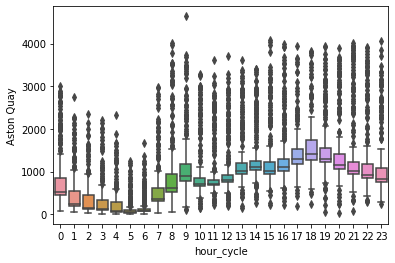

In [451]:
sns.boxplot(x=data_2019_cleaned['hour_cycle'], y=df_2019_final['Aston Quay'])

<AxesSubplot:xlabel='hour_cycle', ylabel='Aston Quay'>

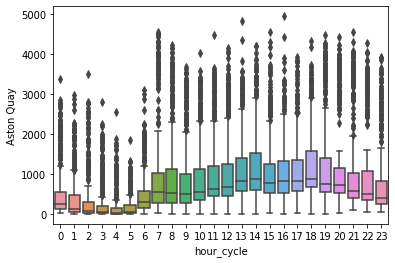

In [452]:
sns.boxplot(x=data_2020_cleaned['hour_cycle'], y=df_2020_final['Aston Quay'])

<AxesSubplot:xlabel='hour_cycle', ylabel='Aston Quay'>

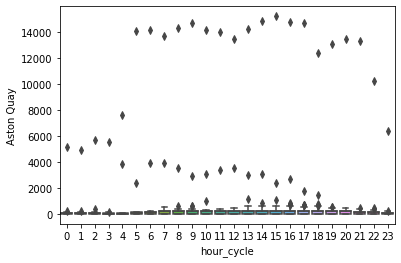

In [456]:
sns.boxplot(x=data_2021_cleaned['hour_cycle'], y=df_2021_final['Aston Quay'])